In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(5)

In [7]:

# Discretized time
T=1000
dt=.1
time=np.arange(0,T,dt)

# Presynaptic rates summed across all
# presynaptic e and i neurons
#re=8/1000

r1 = 7.5/1000
r2 = 10/1000
A = 0.0013
omega = 0.01

r3 = r1+ A*np.sin( omega*time )
r4 = r2+ A*np.sin( omega*time )

re = r4
ri=15/1000

# Number of postsynaptic, exc, and inh neurons
N=100
Ne=2000
Ni=500

# Connection weights and probabilities
je=16
pe=0.1
ji=-16
pi=0.1


# Synapse parameters
Je=je*np.random.binomial(1,pe,(N,Ne))
Ji=ji*np.random.binomial(1,pi,(N,Ni))
taue=5
taui=5


# Neuron parameters
EL=-72
taum=10
Vth=5
Vre=-75
VT=-55
D=2

In [8]:

# Stationary mean of Ie and Ii
# from mean-field theory
we=je*pe*Ne
wi=ji*pi*Ni
IeBar=we*re
IiBar=wi*ri
IBar=IeBar+IiBar

# g and theta from the fit in EIFficurve.ipynb
g = 0.00358
theta = 9.64

# Define f-I curve
def f(I):
    return g*(I-theta)*(I>theta)



# Mean firing rate predicted from MF theory
rBarMF=f(we*re+wi*ri)
print('Postsynaptic rate predicted by MF approx. =',1000*rBarMF,'Hz')

# Generate spike densities
Se=np.random.binomial(1,re*dt,(Ne,len(time)))/dt
Si=np.random.binomial(1,ri*dt,(Ni,len(time)))/dt


# Euler solver to compute Is and V
t0=tm()
Ie=np.zeros((N,len(time)))
Ii=np.zeros((N,len(time)))
V=np.zeros((N,len(time)))
S=np.zeros((N,len(time)))
V[:,0]=EL
for i in range(len(time)-1):

    # Euler step
    V[:,i+1]=V[:,i]+dt*(-(V[:,i]-EL)+D*np.exp((V[:,i]-VT)/D)+Ie[:,i]+Ii[:,i])/taum
    Ie[:,i+1]=Ie[:,i]+dt*(-Ie[:,i]+Je@Se[:,i])/taue
    Ii[:,i+1]=Ii[:,i]+dt*(-Ii[:,i]+Ji@Si[:,i])/taui

    # Threshold-reset condition
    Inds=np.where(V[:,i+1]>=Vth)
    V[Inds,i+1]=Vre
    V[Inds,i]=Vth  # This makes plots nicer
    S[Inds,i+1]=1/dt
print('time for sim = ',tm()-t0,'s')

# Extract spike times and neuron numbers
[I,J]=np.nonzero(Se)
eSpikeTimes=J*dt
eNeuronNumbers=I
[I,J]=np.nonzero(Si)
iSpikeTimes=J*dt
iNeuronNumbers=I
[I,J]=np.nonzero(S)
SpikeTimes=J*dt
NeuronNumbers=I

# Time-averaged, neuron-averaged rate
rBar=np.mean(S)
print('Time-avg, neuron-avg postsynaptic rate =',1000*rBar,'Hz')

# Compute a smoothed trial-averaged rate
# by convolving the mean of S with a kernel
sigma=10
s=np.arange(-3*sigma,3*sigma,dt)
k=np.exp(-(s**2)/(2*sigma**2))
k=k/(sum(k)*dt)
SmoothedRate=np.convolve(k,np.mean(S,axis=0),'same')*dt

Postsynaptic rate predicted by MF approx. = [37.0888     37.1036928  37.11858558 ... 29.02432718 29.01181084
 28.99930257] Hz
time for sim =  9.785626411437988 s
Time-avg, neuron-avg postsynaptic rate = 41.75 Hz


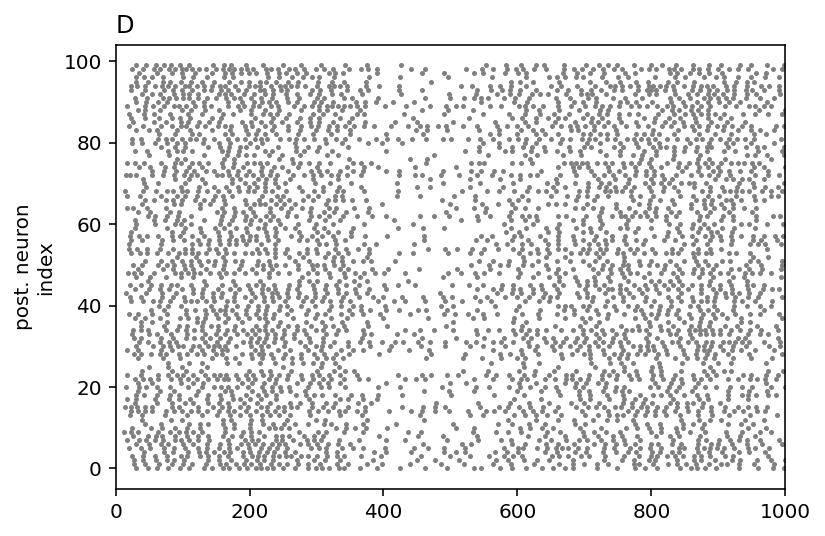

In [9]:
NumToPlot=500
plt.plot(SpikeTimes[NeuronNumbers<NumToPlot],NeuronNumbers[NeuronNumbers<NumToPlot],'.',markersize=3,color='gray')
plt.ylabel('post. neuron\nindex')
plt.title('D',loc='left')
plt.xlim(xmin = 0, xmax=1000)
plt.show()

Text(0.0, 1.0, 'E')

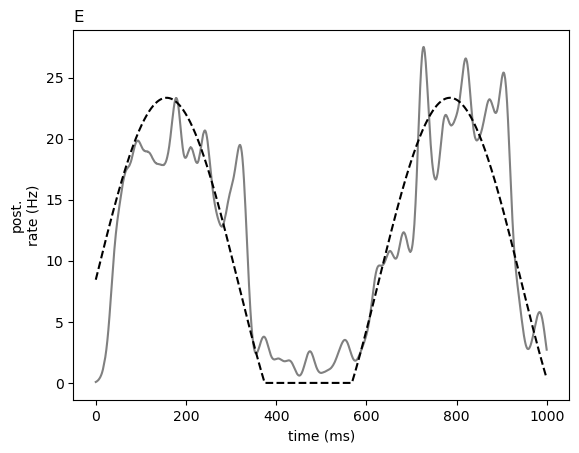

In [5]:
plt.plot(time,1000*SmoothedRate,color='gray')
plt.plot(time,1000*rBarMF+np.zeros_like(time),'k--')
plt.xlabel('time (ms)')
plt.ylabel('post.\nrate (Hz)')
plt.title('E',loc='left')

PROBLEM 2


In [59]:
taue=12
taui=8
taue2=4
taui2=8

In [60]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(6)

# Discretized time
T=200
dt=.1
time=np.arange(0,T,dt)
Nt=len(time)

# Use parameters from old spiking network simulations
# to build W. This way, the fixed point rates will
# approximate steady-state rates in spiking net sims
# Number of external, exc and inh neurons
Nx=800
Ne=800
Ni=200
jex=30
jix=20
jee=12
jei=-45
jie=35
jii=-70
pex=.2
pix=.2
pee=.2
pei=.2
pie=.2
pii=.2
rx=5/1000
wex=jex*pex*Nx
wix=jix*pix*Nx
Wx=np.array([wex,wix])

# Entries of W
wee=jee*pee*Ne
wei=jei*pei*Ni
wie=jie*pie*Ne
wii=jii*pii*Ni
W=np.array([[wee, wei],  [wie, wii]])

# Mean-field external input
Xe=wex*rx
Xi=wix*rx
X=np.array([Xe,Xi])

# Time constants for rate equation
tau=np.array([taue,taui])


# g and theta from the fit in EIFficurve.ipynb
g = 0.00358
theta = 9.64

rFixedPoint=np.linalg.inv((1/g)*np.eye(2)-W)@(X-theta)


# Define f-I curve
def f(I):
    return g*(I-theta)*(I>theta)


# Define the  Jacobian
J=np.array([[(g*wee-1)/taue, g*wei/taue],[g*wie/taui, (g*wii-1)/taui]])#(1/tau)*(-np.eye(2)+g*W)
lam,_=np.linalg.eig(J)
print('Eigenvalues of Jacobian 1:',lam)

# Initialize rate
re=np.zeros(Nt)
ri=np.zeros(Nt)

# Euler loop
t0=tm()
for i in range(len(time)-1):
    re[i+1]=re[i]+(dt/taue)*(-re[i]+f(wee*re[i]+wei*ri[i]+Xe))
    ri[i+1]=ri[i]+(dt/taui)*(-ri[i]+f(wie*re[i]+wii*ri[i]+Xi))

print('time for sim = ',tm()-t0,'s')



# Now re-run with excitation faster
tau2=np.array([taue2,taui2])

# Initialize rate
re2=np.zeros(Nt)
ri2=np.zeros(Nt)

# Euler loop
t0=tm()
for i in range(len(time)-1):
    re2[i+1]=re2[i]+(dt/taue2)*(-re2[i]+f(wee*re2[i]+wei*ri2[i]+Xe))
    ri2[i+1]=ri2[i]+(dt/taui2)*(-ri2[i]+f(wie*re2[i]+wii*ri2[i]+Xi))


# Define the  Jacobian and compute eigenvalues
J2=np.array([[(g*wee-1)/taue2, g*wei/taue2],[g*wie/taui2, (g*wii-1)/taui2]])
lam2,_=np.linalg.eig(J2)
print('Eigenvalues of Jacobian 2:',lam2)


Eigenvalues of Jacobian 1: [-0.44426667+0.68837785j -0.44426667-0.68837785j]
time for sim =  0.005514383316040039 s
Eigenvalues of Jacobian 2: [0.0452+1.41833274j 0.0452-1.41833274j]


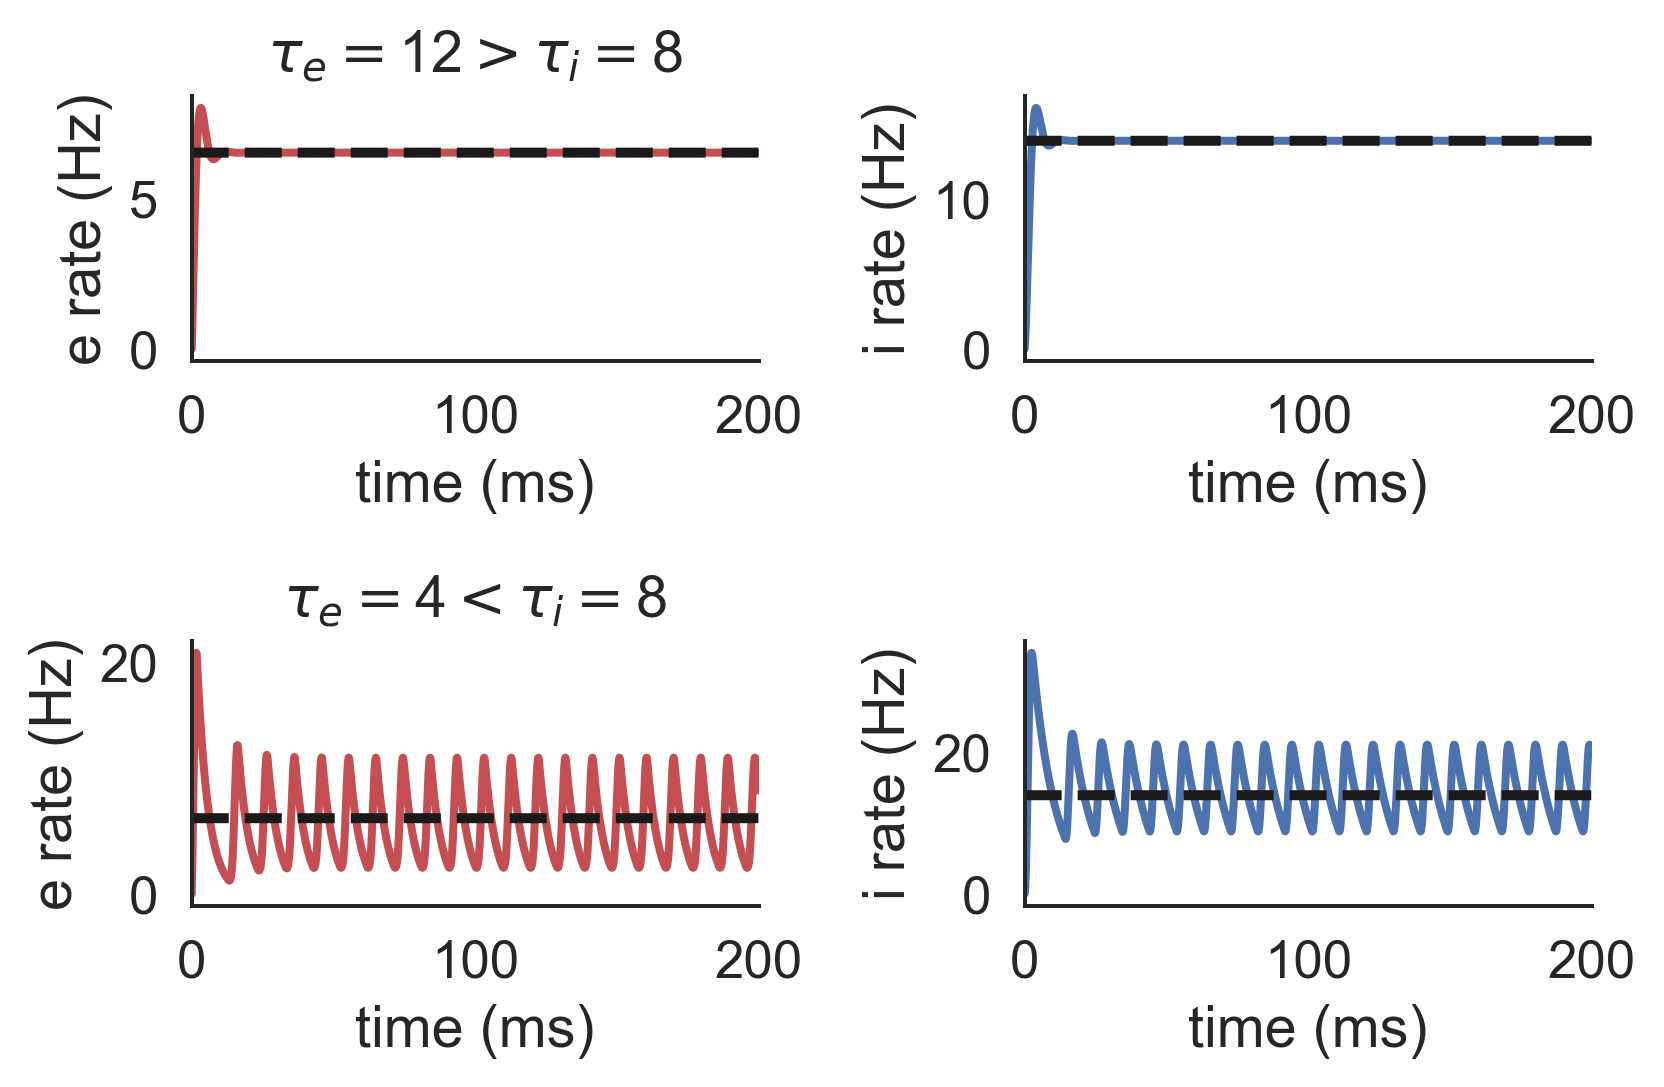

In [64]:

# Example variables (to avoid errors when testing)
# time = np.linspace(0, 10, 1000)
# re, ri, re2, ri2 = np.sin(time), np.cos(time), np.sin(2*time), np.cos(2*time)
# rFixedPoint = [0.2, 0.4]
# T = 10

# Make figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(time, 1000*re, 'r', lw=2)
ax1.plot(time, 1000*rFixedPoint[0] + np.zeros_like(time), 'k--')
ax1.set_xlim([0, T])
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('e rate (Hz)')
ax1.set_title(r'$\tau_e = $'+f"{taue}"+r'$> \tau_i = $'+f"{taui}")
#ax1.set_title('A', loc='left')
sns.despine(ax=ax1)

ax2.plot(time, 1000*ri, 'b', lw=2)
ax2.plot(time, 1000*rFixedPoint[1] + np.zeros_like(time), 'k--')
ax2.set_xlim([0, T])
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('i rate (Hz)')
#ax2.set_title('B', loc='left')
sns.despine(ax=ax2)

ax3.plot(time, 1000*re2, 'r', lw=2)
ax3.plot(time, 1000*rFixedPoint[0] + np.zeros_like(time), 'k--')
ax3.set_xlim([0, T])
ax3.set_xlabel('time (ms)')
ax3.set_ylabel('e rate (Hz)')
ax3.set_title(r'$\tau_e = $'+f"{taue2}"+r'$< \tau_i = $'+f"{taui2}")
#ax3.set_title('C', loc='left')
sns.despine(ax=ax3)

ax4.plot(time, 1000*ri2, 'b', lw=2)
ax4.plot(time, 1000*rFixedPoint[1] + np.zeros_like(time), 'k--')
ax4.set_xlim([0, T])
ax4.set_xlabel('time (ms)')
ax4.set_ylabel('i rate (Hz)')
#ax4.set_title('D', loc='left')
sns.despine(ax=ax4)

plt.tight_layout()
plt.show()


PROBLEM 3


In [84]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

### First do the classical model

# Discretized time
T=3000
dt=.5
time=np.arange(0,T,dt)

# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=.25
wei=-.5
wie=.5
wii=0
Xe=10/1000
Xi=0/1000
taue=30
taui=10

# Build matrix and vector forms
W=np.array([[wee,0,wei],[0,wee,wei],[wie,wie,wii]])
X=np.zeros((3,len(time)))
tau=np.array([taue,taue,taui])

# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=1500
tSurrOn=1500
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=S*Xe

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((3,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau


##### Now do the ISN model


# Define network params. 
# The w's are dimensionless
# Let's interpret time in ms
# and r in 1/ms=kHz.
wee=2
wei=-4
wie=5
wii=-7
Xe=20/1000
Xi=10/1000
taue=12
taui=40

# Build matrix and vector forms
W=np.array([[wee,wei],[wie,wii]])
X=np.zeros((2,len(time)))
tau=np.array([taue,taui])


# The times at which each stimulus turn on/off
tCenterOn=500
tCenterOff=2500
tSurrOn=1500
tSurrOff=2500

# Make stimulus
C=np.zeros(len(time))
S=np.zeros(len(time))
C[int(tCenterOn/dt):int(tCenterOff/dt)]=1
C[int(tSurrOn/dt):int(tSurrOff/dt)]=1
S[int(tSurrOn/dt):int(tSurrOff/dt)]=1
X[0,:]=C*Xe
X[1,:]=C*Xi+S*Xi

# Define f-I curve
def f(I):
    return (I)*(I>0)

# Euler loop
r=np.zeros((2,len(time)))
for i in range(len(time)-1):
    r[:,i+1]=r[:,i]+dt*(-r[:,i]+f(W@r[:,i]+X[:,i]))/tau

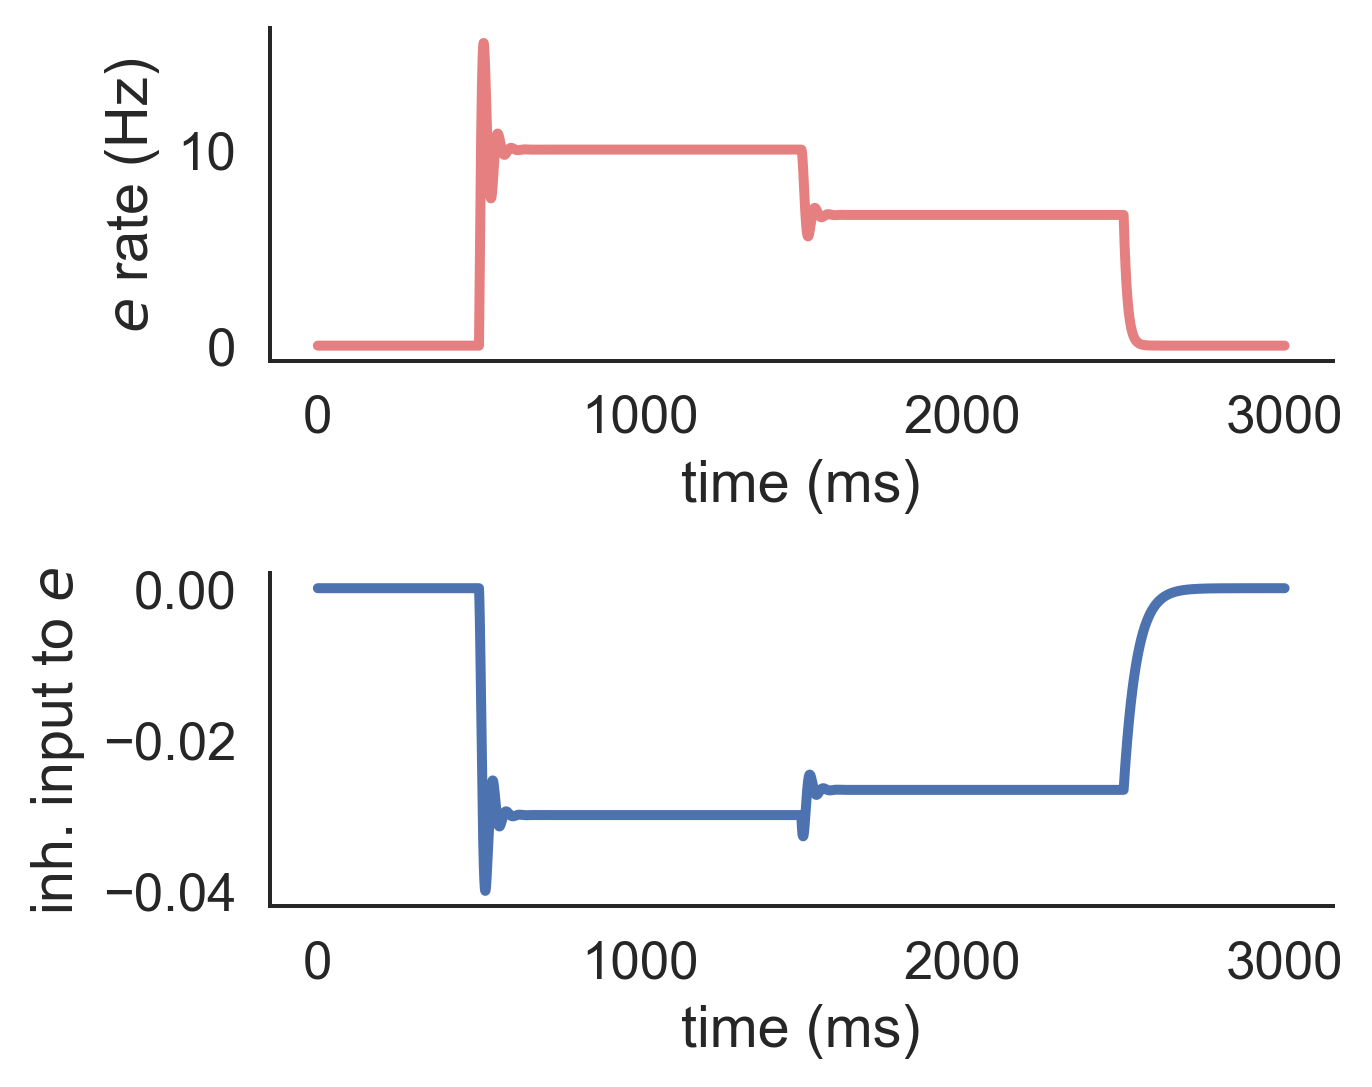

In [85]:
# Make figure

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(5, 4)
ax1.plot(time,1000*r[0,:],color=[.9,.5,.5])
ax1.set_xlabel('time (ms)')
ax1.set_ylabel(r'$e$ rate (Hz)')
sns.despine(ax=ax1)

ax2.plot(time,wei*r[1,:],'b')
ax2.set_xlabel('time (ms)')
ax2.set_ylabel(r'inh. input to $e$')
sns.despine(ax=ax2)

plt.tight_layout()

PROBLEM 4


In [89]:
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')
%config InlineBackend.figure_format = 'retina'

###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(5)

In [90]:
# First let's make a plot of Delta J versus Delta t.
# Note: We will use different params for the network.
##################################

epsilon = 1;
tauy = 150;
r0 = 30/1000;
dts=np.arange(-1300,1300,1)
dJs=-(epsilon/tauy)*(np.exp(-np.abs(dts)/tauy) - 2*r0)


##################################
### Now let's do a spiking network simulation
##################################

# Discretized time
T=2000
dt=.1
time=np.arange(0,T,dt)
Nt=len(time)

# Number of external, exc and inh neurons
Nx=800
Ne=800
Ni=200 

# # Connection strengths
jex=30.0
jix=20.0
jee=12.0
jei=-45.0
jie=35.0
jii=-70.0

# Connection probabilities
pex=.2
pix=.2
pee=.2 
pei=.2 
pie=.2 
pii=.2

# External neuron firing rates
rx=10/1000

# EIF neuron parameters
taum=10 
EL=-72 
Vre=-72 
VT=-55 
D=2 
Vth=0


# Synaptic time constants
taux=8
taue=6
taui=4

# Plasticity parameters
tauy=150
epsilon=50.0
r0=5/1000


# Generate external spike trains as Poisson processes
Sx=np.random.binomial(1,rx*dt,(Nx,len(time)))/dt

# Initialize membrane potentials randomly
Ve=np.random.rand(Ne)*(VT-EL)+EL
Vi=np.random.rand(Ni)*(VT-EL)+EL


# Initialize all else as zeros
Iex=np.zeros(Ne)
Iee=np.zeros(Ne)
Iei=np.zeros(Ne)
Iix=np.zeros(Ni)
Iie=np.zeros(Ni)
Iii=np.zeros(Ni)
ye=np.zeros(Ne)
yi=np.zeros(Ni)
Se=np.zeros((Ne,len(time)))
Si=np.zeros((Ni,len(time)))


# Connection matrices
t0=tm()
Jex=jex*np.random.binomial(1,pex,(Ne,Nx))
Jee=jee*np.random.binomial(1,pee,(Ne,Ne))
Jei=jei*np.random.binomial(1,pei,(Ne,Ni))
Jix=jix*np.random.binomial(1,pix,(Ni,Nx))
Jie=jie*np.random.binomial(1,pie,(Ni,Ne))
Jii=jii*np.random.binomial(1,pii,(Ni,Ni))
print('Time to generate Js:',tm()-t0,'sec')



Omegaei=np.zeros((Ne,Ni))
Omegaei[Jei<0]=1

t0=tm()
eNumSpikes=0
iNumSpikes=0
iX=0
for i in range(len(time)-1):

    
    # Euler step for membrane potentials
    Ve=Ve+dt*(-(Ve-EL)+D*np.exp((Ve-VT)/D)+Iex+Iee+Iei)/taum 
    Vi=Vi+dt*(-(Vi-EL)+D*np.exp((Vi-VT)/D)+Iix+Iie+Iii)/taum 

    # Euler step for synaptic currents
    Iex=Iex+dt*(-Iex+Jex@Sx[:,i])/taux      
    Iee=Iee+dt*(-Iee+Jee@Se[:,i])/taue
    Iei=Iei+dt*(-Iei+Jei@Si[:,i])/taui    
    Iix=Iix+dt*(-Iix+Jix@Sx[:,i])/taux    
    Iie=Iie+dt*(-Iie+Jie@Se[:,i])/taue
    Iii=Iii+dt*(-Iii+Jii@Si[:,i])/taui
    ye=ye+dt*(-ye+Se[:,i])/tauy
    yi=yi+dt*(-yi+Si[:,i])/tauy
    Jei=Jei-dt*epsilon*(np.outer(ye-2*r0,Si[:,i])+np.outer(Se[:,i],yi))*Omegaei
    Jei=np.minimum(Jei,0)
     
    # Find which excitatory neurons spiked.
    Inds=np.nonzero(Ve>=Vth)[0]
    # Reset membrane potentials
    Ve[Inds]=Vre
    # Store spikes as delta functions
    Se[Inds,i+1]=1/dt
    
    # Now do the same for inhibitory neurons
    Inds=np.nonzero(Vi>=Vth)[0] 
    Vi[Inds]=Vre
    Si[Inds,i+1]=1/dt    
      
    
print('time for spiking net sim = ',tm()-t0,'s')


# Compute population-averged rates across time
re=np.mean(Se,axis=0)
ri=np.mean(Si,axis=0)

# Smooth the population-averaged rates
sigma=25
s=np.arange(-3*sigma,3*sigma,dt)
k=np.exp(-(s**2)/(2*sigma**2)) # Gaussian kernel
k[s<0]=0 # Make it causal
k=k/(sum(k)*dt)
re=np.convolve(k,re,'same')*dt
ri=np.convolve(k,ri,'same')*dt

Time to generate Js: 0.028017282485961914 sec
time for spiking net sim =  101.30120825767517 s


In [155]:
##################################
# Now let's do a mean-field rate model
##################################

reMF=np.zeros(len(time))
riMF=np.zeros(len(time))

# Mean-field connectivity
wex=jex*pex*Nx 
wix=jix*pix*Nx 
wee=jee*pee*Ne 
wei=jei*pei*Ni 
wie=jie*pie*Ne
wii=jii*pii*Ni 
wex=jex*pex*Nx 
wix=jix*pix*Nx 

# Mean-field external input
Xe = np.full_like(time, wex*rx)
Xi = np.full_like(time, wix*rx)

changes = np.full_like(time,1)
changes[2000:4000] = .75
changes[6000:8000] = .75
changes[10000:12000] = .75
changes[14000:16000] = .75
#changes = 1+0.5*np.sin(.01*time)
Xe = Xe*changes


# Time constants for rate equation
taue=30
taui=15

epsilonr=2*epsilon*Ni*pei

# g and theta from the fit in EIFficurve.ipynb
g = 0.00358
theta = 9.64

# Define f-I curve
def f(I):
    return g*(I-theta)*(I>theta)

t0=tm()
for i in range(len(time)-1):
    reMF[i+1]=reMF[i]+(dt/taue)*(-reMF[i]+f(wee*reMF[i]+wei*riMF[i]+Xe[i]))
    riMF[i+1]=riMF[i]+(dt/taui)*(-riMF[i]+f(wie*reMF[i]+wii*riMF[i]+Xi[i]))
    wei=wei-dt*epsilonr*(reMF[i]-r0)*riMF[i]
print('time for rate net sim = ',tm()-t0,'s')    

time for rate net sim =  0.04998922348022461 s


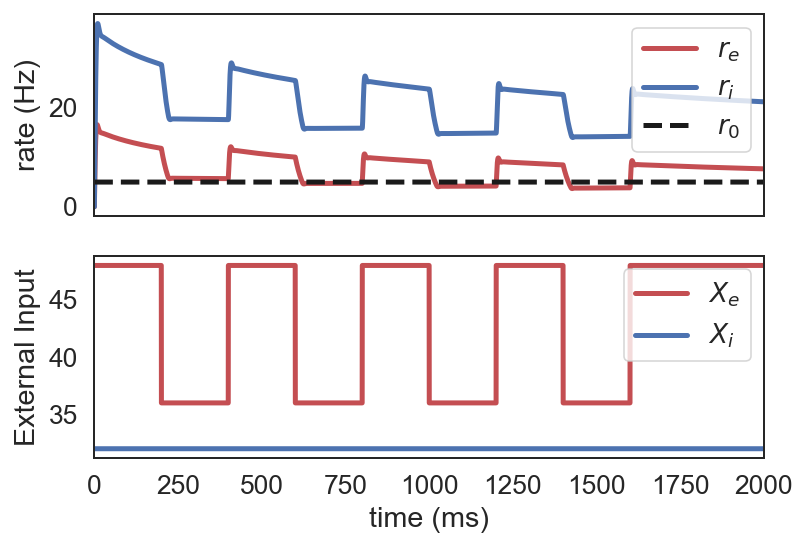

In [156]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(time,1000*reMF,'r',label=r'$r_e$')
ax1.plot(time,1000*riMF,'b',label=r'$r_i$')
ax1.plot(time,1000*r0+np.zeros_like(time),'k--',label=r'$r_0$')


ax1.set_ylabel('rate (Hz)')
ax1.set_xlim([0,T])



ax2.plot(time,Xe,'r',label=r'$X_e$')
ax2.plot(time,Xi,'b',label=r'$X_i$')
ax2.set_xlim([0,T])
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('External Input')

ax1.legend()
ax2.legend()

plt.show()
#sns.despine()


#plt.tight_layout()